# Unravelling mental representations in aphantasia through unsupervised

alignment

Project design and data analysis simulation

Maël Delem  
2/02/2024

Research on aphantasia is confronted with a long-standing conundrum of all research on consciousness and representations, namely the theoretical inaccessibility of subjective representations. Drawing on concepts from similarity and representation research, I endorse the view that the study of an individual’s mental representations is made possible by exploiting second-order isomorphism. The concept of second-order isomorphism means that correspondence should not be sought in the first-order relation between (a) an external object and (b) the corresponding internal representation, but in the second-order relation between (a) the perceived similarities between various external objects and (b) the similarities between their corresponding internal representations. Building on this idea, this study project report is divided into five parts. **First**, I outline the central ideas underlying similarity research and its applicability to aphantasia research. **Second**, I present a methodological rationale and protocol based on inverse multidimensional scaling that can be implemented online to conduct such large-scale research with high efficiency. **Third**, I present a data analysis plan using a state-of-the-art method for similarity analysis, unsupervised alignment with Gromov-Wasserstein optimal transport (GWOT). **Fourth**, I report a data simulation of a potential outcome of this project and the successful analysis of this synthetic data using GWOT alignment. **Fifth**, I analyse the feasability of such a project given the material constraints of my thesis. I conclude with the expected utility and benefits of this project.

> **Project inception**
>
> This project stems from several elements:
>
> 1.  The long standing knowledge of the fact that internal representations seem impossible to reach due to their subjective nature.
>
> 2.  The discovery of the article of @shepardSecondorderIsomorphismInternal1970 that expose the idea of “second-order isomorphism”.
>
> 3.  The discovery of state-of-the-art and accessible unsupervised analytic methods to study this principle in an astonishing way. The last two discoveries (and many more) are the fruit of amazing discussions and recommendations from Ladislas when he came here. These motivated me to try to implement GWOT in R on data that I wanted to create myself to emulate a study we could do.
>
> *I promise that I did this mostly on my spare time, we have too many other things to do elsewhere.*

# Theoretical context

## Psychological spaces and aphantasia

While attempting to demonstrate the uselessness of the concept of similarity as a philosophical and scientific notion[1], @goodmanSevenStricturesSimilarity1972 has inadvertently expressed an aspect of similarity judgements of primary importance to us aphantasia researchers:

> Comparative judgments of similarity often require not merely selection of relevant properties but a weighting of their relative importance, and variation in both relevance and importance can be rapid and enormous. Consider baggage at an airport checking station. The spectator may notice shape, size, color, material, and even make of luggage; the pilot is more concerned with weight, and the passenger with destination and ownership. Which pieces are more alike than others depends not only upon what properties they share, but upon who makes the comparison, and when. . . . Circumstances alter similarities.

This can be easily reversed as an argument in favor of the **potential of similarity analyses to highlight the inter-individual differences in sensory mental representations**. For example, should we ask individuals to judge the similarities in shape or color between various objects, the *differences between the similarity structures* of individuals will be precisely the most important phenomenon for us, far less than the constancy between these structures. If we can account for the context dependence, as we will propose here with explicit instructions, clever task design, and hypothesis-neutral analysis, we could overcome the limitations of the inherently subjective nature of similarity judgements.

This idea of a difference in similarity judgements in aphantasia seems to transpire in the results of @bainbridgeQuantifyingAphantasiaDrawing2021 on their drawing study. They have shown that aphantasics had more schematic representations during recall, accurate in their spatial positioning, but with less sensory details. This difference can be seen from two perspectives: (1) a memory deficit for sensory properties; (2) a different representational structure of the items in their psychological spaces. In the latter case, aphantasics would have greater/faster abstraction of their representation of a perceived scene, reducing the amount of encoded sensory details unconsciously considered to be relevant. Both (1) and (2) can theoretically explain the same behavioural response, i.e. less sensory elements and correct spatial recall accuracy in aphantasic drawings, but **the two have drastically different consequences on how we define, characterize, and judge aphantasia.**

The dominant hypothesis seems to be that aphantasics simply have an episodic or general memory deficit. Conversely, I hypothesize that aphantasics have different representational structures than phantasics in certain dimensions of their psychological spaces (notably sensory, but potentially abstract too). More generally, I hypothesize that the concept of visual imagery evaluates in reality the continuous spectrum of representational structures in *sensory* dimensions of psychological spaces. Mirroring visual imagery, spatial imagery could also be a rough psychometric evaluation of the continuous spectrum of structural differences in *conceptual/abstract* dimensions of psychological spaces. In this view, the psychological space of aphantasics would constrain internal representations to particularly abstract forms from a very early stage, thus selectively limiting the item properties thereafter encoded in long-term memory. In other terms, **I hypothesize that aphantasia would not be characterized by an episodic memory deficit, but by an episodic memory *selectivity* caused by the specific characteristics of their representational structures and psychological spaces.** This selectivity would have, as we already hypothesized several times, benefits and drawbacks.

@gardenforsConceptualSpacesFramework2004 proposed that differences in psychological (in his terms, conceptual) spaces could arise from various sources, whether innate, due to learning, or broader cultural or social differences. All these hypotheses could be coherent to explain the sources of aphantasia. Nevertheless, the study of these sources should be the subject of very large-scale or longitudinal studies, which are out of the scope of this project.

Here, we shall rather attempt to **develop a method to characterize the differences in aphantasics’ representational structures and psychological spaces.**

# Methodology

@roads2024, in a recent review on the state and perspectives of similarity research, highlighted two challenges that studies in this field had to face: (1) The high cost of collecting behavioral data on a large number of stimuli; (2) The lack of software packages being a high barrier to entry, making the task of coding models difficult for the uninitiated.

To solve these problems, we present here two solutions, respectively for (1) experimental design and (2) data analysis:

1.  A recent method to efficiently acquire similarity judgements, the “multiple arrangement of items” and “inverse multidimensional scaling” developed by @kriegeskorteInverseMDSInferring2012.
2.  An accessible and robust Python toolbox provided by @sasakiToolboxGromovWassersteinOptimal2023 to conduct unsupervised alignment analysis using Gromov-Wasserstein optimal transport.

## Experimental design

### Multi-arrangement and inverse multidimensional scaling

Assuming a geometric model of representational similarities, @kriegeskorteInverseMDSInferring2012 developed a multi-arrangement (MA) method to efficiently acquire (dis)similarity judgments for large sets of objects. The subject has to perform multiple arrangements of item subsets adaptively designed for optimal measurement efficiency and for estimating the representational dissimilarity matrix (RDM) by combining the evidence from the subset arrangements.

The procedure is illustrated in @fig-multi-arrangement.

![**Acquiring similarity judgements with the multi-arrangement method. (A)** Subjects are asked to arrange items according to their similarity, using mouse drag-and-drop on a computer. The similarity measure is taken as the distances between the items: similar items are closer, while dissimilar items are further apart. The upper part of the figure shows screenshots at different moments of the acquisition for one subject. Columns are trials and rows show the object arrangements over time, running from the start (top row) to the end (last row). The first trial contains all items; subsequent trials contain subsets of items that are adaptively selected to optimally estimate judged similarity for each subject. **(B)** Once acquisition of the final judgements is completed, inter-item distances in the final trial arrangements are combined over trials by rescaling and averaging to yield a single dissimilarity estimate for each object pair. The process is illustrated in this figure for two example item pairs: a boy’s face and a hand (red), and carrots and a stop sign (blue). Their single-trial dissimilarity estimates (arrows) are combined into a single dissimilarity estimate, which is placed at the corresponding entry of the RDM (lower panel). Mirror-symmetric entries are indicated by lighter colors. Figure taken from @murHumanObjectSimilarityJudgments2013.](attachment:images/multi-arrangement-method-mur-2013.png){#fig-multi-arrangement .column-body }

A key strength of this method that sets it as particularly effective is the “adaptive” part. The goal of the process is to acquire similarity judgements as precisely as possible while minimizing the total amount of trials. To do so, starting from the second trial, selected subsets of the items to be compared are presented to the subject: these items are the ones that were very close on-screen in previous trials and thus had their distance evaluated with lower accuracy by the subject. As the subject has to fill the entire “arena” with the items, these subsequent trials will necessarily increase the level of precision in the similarity judgement between pairs of items. The second key benefit of this method is the time and effort gain compared to others. For example, to compare every pair of items among 64 different items would require $\frac{64 \times (64-1)}{2} = 2016$ comparisons (i.e. trials). This would be extremely time-consuming, while also losing the *context-independence* afforded by the MA method due to the presence of other items around every time the subject mentally performs a pairwise comparison.

Historically, when referring to the projection of the representations of stimuli (e.g., coordinates in geometric space) from a high-dimensional space into a lower-dimensional space, inference algorithms were commonly called multidimensional scaling \[@roads2024\]. By analogy, the process of combining several lower-dimensional (2D) similarity judgements on-screen to form one higher dimensional similarity representation (in the RDM) can be conceptually seen as “inverse” multidimensional scaling, hence the name given to the method by @kriegeskorteInverseMDSInferring2012.

### Principle

The idea is simple: for a given set of items that have distinct and very pictorial visual properties, we would ask a wide range of aphantasics, phantasics or hyperphantasics to imagine, mentally compare and make similarity judgements between the items. To compare these representations with actual perceptual representations, the subjects would also perform the same task afterwards, this time with actual pictures to compare. Subjects would also fill our usual psychometric imagery questionnaires.

To “compare imagined items”, we could use a “word” version of the MA paradigm. An example from @majewskaSpatialMultiarrangementClustering2020 - *who used the method to build large-scale semantic similarity resources for Natural Language Processing systems* - is represented in @fig-majewska.

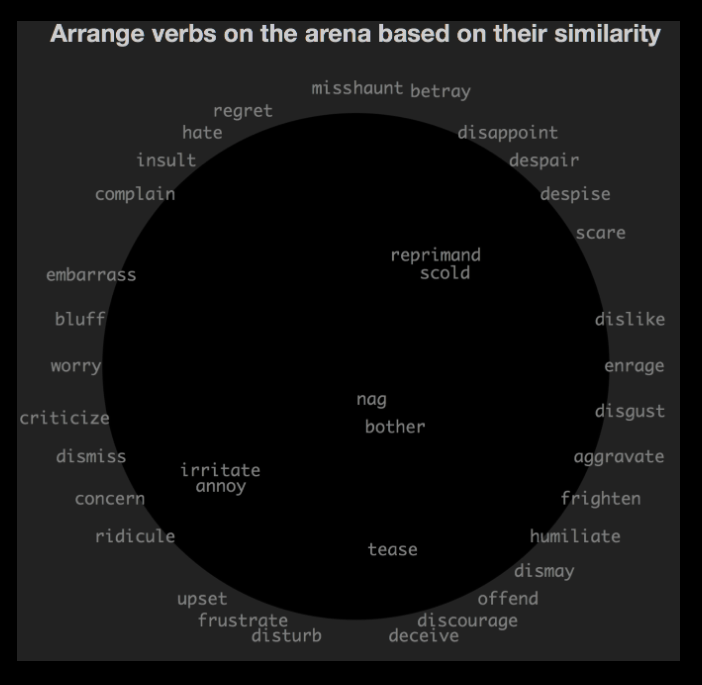{#fig-majewska width="50%"}

## Hypotheses

### Aphantasic and phantasic psychological spaces

The most representative members of a category are called prototypical members.

Prototype theory builds on the observation that among the instances of a property, some are more representative than others. The most representative one is the prototype of the property.

Thus, following the concepts illustrated by Gardenfors, we would expect that aphantasics, when doing shape similarity judgements, would be more inclined to group items close to the prototypical items due to a lower definition of the mental image. In comparison, phantasics would have a much more distributed conceptual space of item shapes due to their higher-resolution mental images of said items.

### Subjective imagery and psychological spaces

In the proposed view of visual imagery as the subjective expression of a given type of psychological space, we mentioned earlier that *spatial* imagery could also constitute a subjective expression of other dimensions of psychological spaces. Hence, the *verbal* dimension of the simplified model of imagery we outlined in my thesis project could also represent different dimensions.

This conception leads to the following theoretical hypothesis: provided that our visual-spatial-verbal model correctly fits subjective imagery, the imagery profile of individuals should map on their psychological spaces.

Operationally, this would be evaluated by the fact that **individuals with similar imagery profiles** (visual, spatial, verbal, or any combination of the three) **should have similar representations** in their given psychological space, **quantifiable by the degree of alignment between their similarity structures.**

<figure>
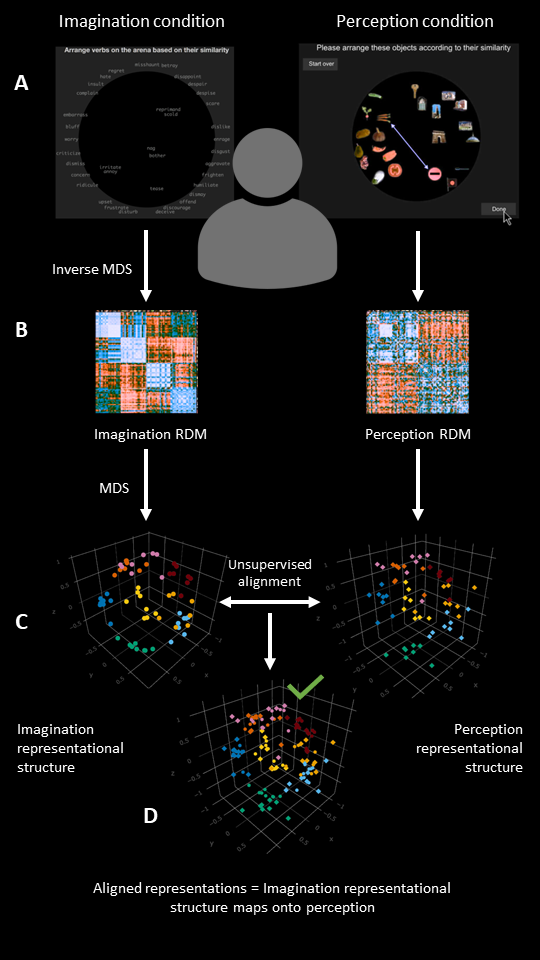
<figcaption aria-hidden="true">The two conditions for one subject.</figcaption>
</figure>

<figure>
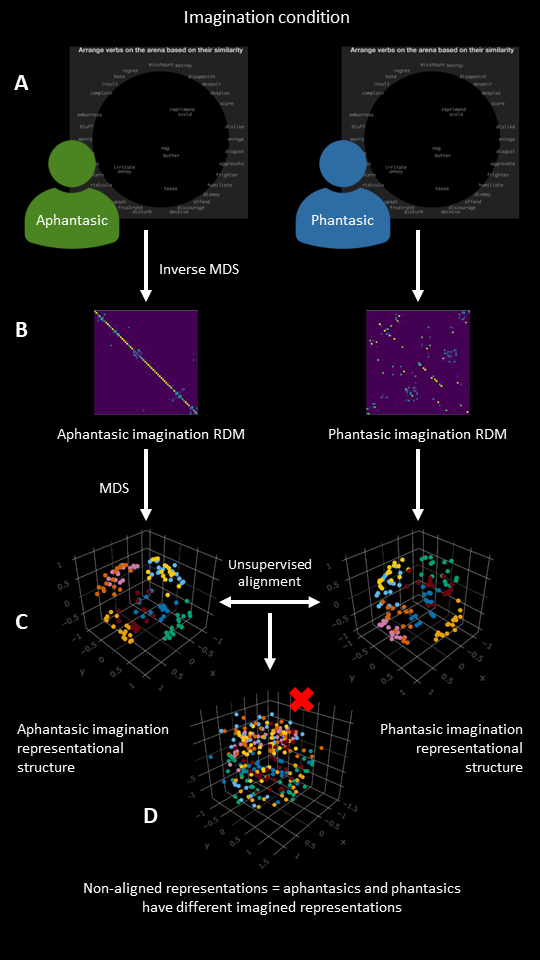
<figcaption aria-hidden="true">The comparison between the representational structure of aphantasics and phantasics. This figure illustrates the principle, but in reality all pairs of subjects will be compared to assess their representational structure alignment. This is computationnally heavy, but analytically very powerful.</figcaption>
</figure>

[1] A claim dismissed since then by propositions of robust mathematical models of similarity, e.g. @gardenforsConceptualSpacesFramework2004, @decockSimilarityGoodman2011.
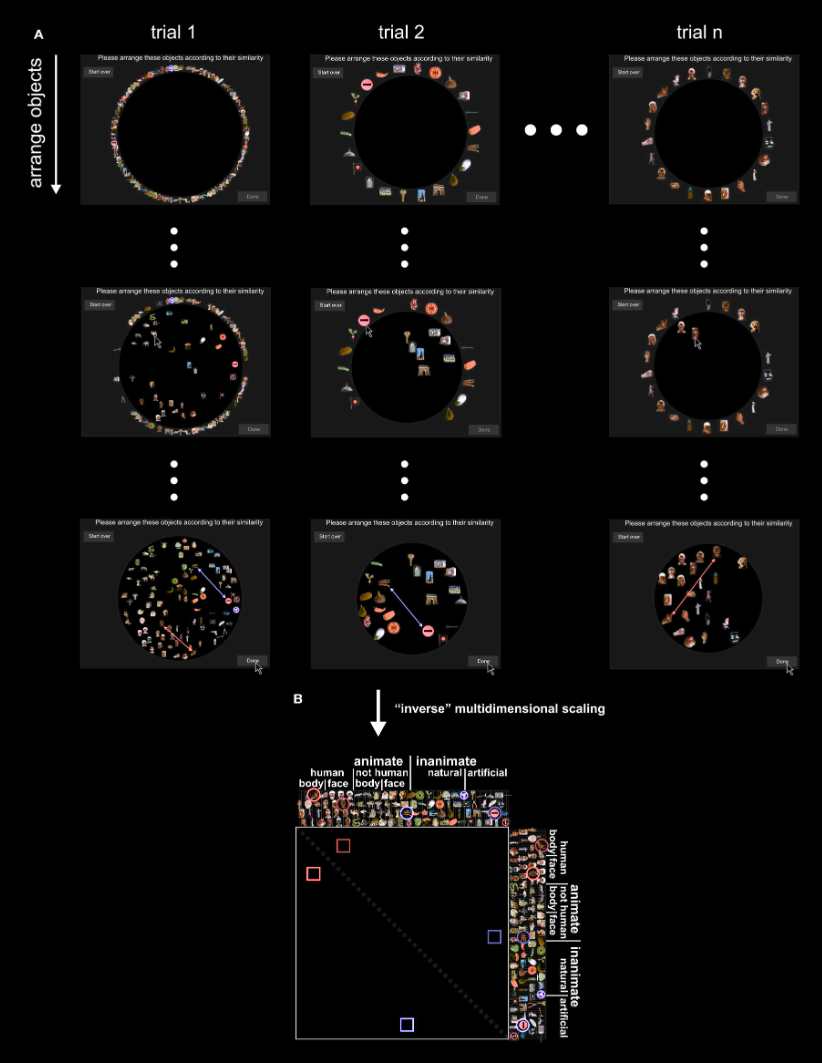

# Study data simulation and analysis

In [ ]:
# ═══ Packages ═════════════════════════════════════════════════════════════════

if (!require(librarian)) install.packages(librarian) 

Le chargement a nécessité le package : librarian

## Visual-spatial-verbal model of cognitive profiles

One of the objectives of the study would be to link the subjective cogntive profiles of individuals with their representational structures. To evaluate these profiles, we are going to use psychometric questionnaires evaluating the visual-object, spatial, and verbal dimensions of imagery which will yield three scores, one for each dimension.

We are going to simulate 30 participants presenting four different cognitive profiles, that I defined as, respectively, *verbal* aphantasics, *spatial* aphantasics, *spatial* phantasics, and *visual* phantasics. Their imagery abilities are summarised in @tbl-imageries.

To simulate these four sub-groups, we use the `holodeck` R package to generate multivariate normal distributions of scores on these three dimensions for each sub-group. For instance, verbal aphantasics have normally distributed visual imagery scores centered around a mean of 0 (normalized, so negative scores are possible), 0.4 for spatial imagery, and 0.7 for verbal style; Spatial aphantasics have means of 0 for visual, 0.75 spatial, and 0.3 for verbal; etc. The numbers are arbitrary, but have been chosen by trial-and-error to obtain a model that is both well-defined and not exagerrated. The 30 subjects’ imagery profiles are represented in the three dimensional space of the visual-spatial-verbal dimensions in @fig-plot-osv-model.

| Cognitive profile  | Visual imagery | Spatial imagery | Verbal style |
|--------------------|:--------------:|:---------------:|:------------:|
| Verbal aphantasic  |       –        |       \-        |      ++      |
| Spatial aphantasic |       –        |       ++        |      \-      |
| Spatial phantasic  |       \+       |       ++        |      \-      |
| Visual phantasic   |       ++       |       \-        |      \+      |

Down below is the code to generate these scores.

``` python
# The function takes the variance and covariance of the imagery distributions
# as arguments
generate_osv_model <- function(var, cov){
  df <- 
    tibble(group = rep(c("aph", "phant"), each = 8)) |> 
    group_by(group) |> 
    mutate(
      spatial_group = c(rep("spa_low", 4), rep("spa_high", 4)),
      vis_spa_group = paste0(group, "_", spatial_group),
      verbal_group = "verbal_low",
      verbal_group  = case_when(
        vis_spa_group == "aph_spa_low" ~ "verbal_high", 
        vis_spa_group == "phant_spa_low" ~ "verbal_mid",
        TRUE ~ verbal_group)
    ) |> 
    group_by(vis_spa_group) |> 
    # ─── visual ───
    sim_discr(
      n_vars = 1, 
      var = var, 
      cov = cov, 
      # aph_s, aph_v, phant_s, phant_v
      group_means = c(0, 0, 0.6, 0.87), 
      name = "v") |> 
    # ─── spatial ───
    sim_discr(
      n_vars = 1,  
      var = var, 
      cov = cov, 
      # aph_s, aph_v, phant_s, phant_v
      group_means = c(0.75, 0.4, 0.7, 0.3), 
      name = "s") |>
    # ─── verbal ───
    sim_discr(
      n_vars = 1,  
      var = var, 
      cov = cov, 
      # aph_s, aph_v, phant_s, phant_v
      group_means = c(0.3, 0.7, 0.3, 0.5), 
      name = "i") |>
    rename(
      visual_imagery  = v_1,
      spatial_imagery = s_1,
      verbal_profile  = i_1
      )
}

df <- generate_osv_model(0.03, 0)
```

In [ ]:
plotting_osv_model <- function(df, grouping_variable, size){
  df |> 
    plot_ly(
      x = ~visual_imagery,
      y = ~spatial_imagery,
      z = ~verbal_profile,
      color = ~df[[grouping_variable]],
      text  = ~df[[grouping_variable]],
      colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710"),
      type = "scatter3d",
      mode = "markers+text",
      marker = list(size = size),
      textfont = list(size = size + 4)
    ) |> 
    layout(
      scene = list(
        xaxis = list(
          title = list(text = "Visual imagery", font = list(color = "grey")),
          tickfont = list(color = "grey")
          ),
        yaxis = list(
          title = list(text = "Spatial imagery", font = list(color = "grey")),
          tickfont = list(color = "grey")
          ),
        zaxis = list(
          title = list(text = "Verbal profile", font = list(color = "grey")),
          tickfont = list(color = "grey")
          )
      ),
      legend = list(title = list(text = "Group")),
      paper_bgcolor = "transparent"
      )
}

df |> 
  mutate(vis_spa_group = case_when(
    vis_spa_group == "aph_spa_high" ~ "Aph. spatial",
    vis_spa_group == "aph_spa_low"  ~ "Aph. verbal",
    vis_spa_group == "phant_spa_high" ~ "Phant. spatial",
    vis_spa_group == "phant_spa_low"  ~ "Phant. visual"
  )) |> 
  plotting_osv_model(grouping_variable = "vis_spa_group", size = 4)